# POS Tagging with NLTK

* Author: Johannes Maucher
* Last update: 18.09.2020

Required modules:

In [1]:
from nltk.corpus import brown
from nltk import FreqDist
from nltk import word_tokenize
from nltk import RegexpTagger
from nltk import tag
import nltk

## Regular Expression POS Tagging
Define regular-expression rules, that will be applied for POS tagging.

In [2]:
patterns = [
     (r'.*ing$', 'VBG'),               # gerunds
     (r'.*ed$', 'VBD'),                # simple past
     (r'.*es$', 'VBZ'),                # 3rd singular present
     (r'.*ould$', 'MD'),               # modals
     (r'.*\'s$', 'NN$'),               # possessive nouns
     (r'.*s$', 'NNS'),                 # plural nouns
     (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
     (r'the', 'DT'),                   # Determiner
     (r'in','IN'),                     # preposition
     (r'.*', 'NN')                     # nouns (default)
]

Generate a *RegexpTagger*-object with the defined rules. 

In [3]:
regexp_tagger = RegexpTagger(patterns)

Apply the RegexpTagger for tagging a single sentence:

In [4]:
regexp_tagger.tag("5 friends have been singing in the rain".split())

[('5', 'CD'),
 ('friends', 'NNS'),
 ('have', 'NN'),
 ('been', 'NN'),
 ('singing', 'VBG'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('rain', 'NN')]

Apply the *RegexpTagger* for tagging the first 3 sentences of the brown corpus.

In [5]:
regexp_tagger.tag(brown.sents()[3])

[('``', 'NN'),
 ('Only', 'NN'),
 ('a', 'NN'),
 ('relative', 'NN'),
 ('handful', 'NN'),
 ('of', 'NN'),
 ('such', 'NN'),
 ('reports', 'NNS'),
 ('was', 'NNS'),
 ('received', 'VBD'),
 ("''", 'NN'),
 (',', 'NN'),
 ('the', 'DT'),
 ('jury', 'NN'),
 ('said', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('considering', 'VBG'),
 ('the', 'DT'),
 ('widespread', 'NN'),
 ('interest', 'IN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('election', 'NN'),
 (',', 'NN'),
 ('the', 'DT'),
 ('number', 'NN'),
 ('of', 'NN'),
 ('voters', 'NNS'),
 ('and', 'NN'),
 ('the', 'DT'),
 ('size', 'NN'),
 ('of', 'NN'),
 ('this', 'NNS'),
 ('city', 'NN'),
 ("''", 'NN'),
 ('.', 'NN')]

Evaluate the tagger using category _news_ of the brown corpus. The `evaluate()`-method returns the accuracy (i.e. the rate of correct Tag-assignments) of the tagger on this test-corpus.

In [6]:
brown_tagged_sents=brown.tagged_sents(categories='news')
print(regexp_tagger.evaluate(brown_tagged_sents))

0.2198321299998011


## Unigram Tagger

In [7]:
from nltk import UnigramTagger, DefaultTagger, BigramTagger
from nltk import FreqDist,ConditionalFreqDist

A UnigramTagger requires a tagged corpus. From the tagged corpus it learns a mapping from word to pos-tag by determining for each word the most frequent tag in the corpus. The trained tagger then assigns to each word the most frequent pos-tag as determined in the training corpus.

In this notebook the pos-tagged Brown Corpus is applied. The tagset used in this corpus is quite sophisticated. It can be obtained by the following command:

In [8]:
nltk.help.brown_tagset()

(: opening parenthesis
    (
): closing parenthesis
    )
*: negator
    not n't
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ? ; ! :
:: colon
    :
ABL: determiner/pronoun, pre-qualifier
    quite such rather
ABN: determiner/pronoun, pre-quantifier
    all half many nary
ABX: determiner/pronoun, double conjunction or pre-quantifier
    both
AP: determiner/pronoun, post-determiner
    many other next more last former little several enough most least only
    very few fewer past same Last latter less single plenty 'nough lesser
    certain various manye next-to-last particular final previous present
    nuf
AP$: determiner/pronoun, post-determiner, genitive
    other's
AP+AP: determiner/pronoun, post-determiner, hyphenated pair
    many-much
AT: article
    the an no a every th' ever' ye
BE: verb 'to be', infinitive or imperative
    be
BED: verb 'to be', past tense, 2nd person singular or all persons plural
    were
BED*: verb 'to be', past tense, 2nd person singular or 

However, NLTK provides a method to map the most common tagsets to a simple [universal POS Tagset](http://www.nltk.org/book/ch05.html). 

| Tag | Meaning | English Examples | 
| --- | --- | --- | 
| ADJ | adjective | new, good, high, special, big, local | 
| ADP | adposition | on, of, at, with, by, into, under | 
| ADV | adverb | really, already, still, early, now | 
| CONJ | conjunction | and, or, but, if, while, although | 
| DET | determiner, article | the, a, some, most, every, no, which | 
| NOUN | noun | year, home, costs, time, Africa | 
| NUM | numeral | twenty-four, fourth, 1991, 14:24 | 
| PRT | particle | at, on, out, over per, that, up, with | 
| PRON | pronoun | he, their, her, its, my, I, us | 
| VERB | verb | is, say, told, given, playing, would | 
| . | punctuation marks | . , ; ! | 
| X | other | ersatz, esprit, dunno, gr8, univeristy |

The Brown Corpus with the simple universal tagset can be obtained as follows:

In [9]:
brown_tagged_sents=brown.tagged_sents(tagset="universal")
print(brown_tagged_sents[:1])

[[('The', 'DET'), ('Fulton', 'NOUN'), ('County', 'NOUN'), ('Grand', 'ADJ'), ('Jury', 'NOUN'), ('said', 'VERB'), ('Friday', 'NOUN'), ('an', 'DET'), ('investigation', 'NOUN'), ('of', 'ADP'), ("Atlanta's", 'NOUN'), ('recent', 'ADJ'), ('primary', 'NOUN'), ('election', 'NOUN'), ('produced', 'VERB'), ('``', '.'), ('no', 'DET'), ('evidence', 'NOUN'), ("''", '.'), ('that', 'ADP'), ('any', 'DET'), ('irregularities', 'NOUN'), ('took', 'VERB'), ('place', 'NOUN'), ('.', '.')]]


A *UnigramTagger*-object is generated and trained with the Brown Corpus with universal tagset:

In [10]:
complete_tagger=UnigramTagger(train=brown_tagged_sents)

The trained Unigram-Tagger is applied to tag a single sentence:

In [11]:
mySent1="the cat is on the mat".split()
print(complete_tagger.tag(mySent1))

[('the', 'DET'), ('cat', 'NOUN'), ('is', 'VERB'), ('on', 'ADP'), ('the', 'DET'), ('mat', 'NOUN')]


Compare tags assigned by the Unigram-Tagger and the tags assigned by the current NLTK standard tagger on a single sentence:

In [12]:
mySent2="This is major tom calling ground control from space".split()
print("Unigram Tagger: \n",complete_tagger.tag(mySent2))
print("\nCurrent Tagger applied for NLTK pos_tag(): \n",nltk.pos_tag(mySent2,tagset='universal'))

Unigram Tagger: 
 [('This', 'DET'), ('is', 'VERB'), ('major', 'ADJ'), ('tom', None), ('calling', 'VERB'), ('ground', 'NOUN'), ('control', 'NOUN'), ('from', 'ADP'), ('space', 'NOUN')]

Current Tagger applied for NLTK pos_tag(): 
 [('This', 'DET'), ('is', 'VERB'), ('major', 'ADJ'), ('tom', 'ADJ'), ('calling', 'VERB'), ('ground', 'NOUN'), ('control', 'NOUN'), ('from', 'ADP'), ('space', 'NOUN')]


The performance of the trained tagger is evaluated on the same corpus as applied for training. The performance measure is the rate of words that have been tagged correctly.

In [13]:
print("Performance of complete Tagger: ",complete_tagger.evaluate(brown_tagged_sents))

Performance of complete Tagger:  0.9570777270253326


The rate of correctly taggged words is quite high. However, this method of evaluation is not valid, since the same corpus has been used for evaluation as for training. Therefore we split the corpus into a *training-part* and a *test-part*. The *UnigramTagger* is then trained with the *training-part* and evaluated with the disjoint  *test-part*.

In [14]:
size = int(len(brown_tagged_sents) * 0.9)
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = UnigramTagger(train_sents,backoff=DefaultTagger("NN"))
print("Performance of Tagger with 90% Training and 10% Testdata: ",unigram_tagger.evaluate(test_sents))

Performance of Tagger with 90% Training and 10% Testdata:  0.9156346262651662


As expected the rate of correctly tagged words is lower, but this value is now a valid evaluation measure.

### Unigram Tagger, which applies only frequent words for training
A trained Unigram Tagger must store a table, which assigns to each word the most frequent POS-tag. Since this table can be quite large, an option is to train the Unigram Tagger only with the most frequent words. 
The following code generates a list of different Unigram taggers, each with an other amount of frequent words of the brown corpus. The plot visualizes the Unigram Tagger performance in dependence of the number of most frequent words, stored in the tagger. Note that in the code below the _UnigrammTagger_ is initialized with a dictionary of tagged words, whereas in the code above the _UnigrammTagger_ is initialized with a corpus of tagged words. Both options are possible. 

In [15]:
def display():
    import pylab
    words_by_freq = FreqDist(brown.words(categories='news')).most_common(2**15)
    cfd = ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

In [16]:
def performance(cfd, wordlist):
    lt = dict((word[0], cfd[word[0]].max()) for word in wordlist)
    baseline_tagger = UnigramTagger(model=lt, backoff=DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))


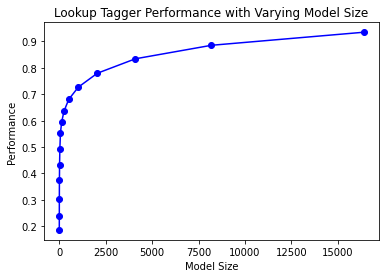

In [17]:
display()

## N-Gram Tagger
Unigram taggers assign to each wort $w_n$ the tag $t_n$, which is the most frequent tag for $w_n$ in the training corpus. N-Gram taggers are a generalization of Unigram-Taggers. During training they determine for each combination of $N-1$ previous tags $t_{n-1},t_{n-2},...$ and the current word $w_n$ the most frequent tag $t_n$. Tagging is then realized, by inspecting the $n-1$ previous tags and the current word $w_n$ and assigning the most frequent tag, which appeared for this combination in the training corpus.  
![NgramTagging](https://maucher.home.hdm-stuttgart.de/Pics/NGramTagging.png)

In [18]:
baseline=nltk.DefaultTagger('NOUN')
unigram = UnigramTagger(train=train_sents,backoff=baseline)
bigram = BigramTagger(train=train_sents,backoff=unigram)

In [19]:
bigram.evaluate(test_sents)

0.9485446658703716

# Find most frequent nouns
The most frequent nouns usually provide information on the subject of a text. Below, the most frequent nouns of an already tagged text of the *Treebank*-corpus are determined. Let's see if we can conclude the text's subject.  

In [20]:
from nltk.corpus import treebank
from nltk import FreqDist
from nltk import bigrams

print("\nTreebank sentences: ", treebank.sents(fileids="wsj_0003.mrg"))


Treebank sentences:  [['A', 'form', 'of', 'asbestos', 'once', 'used', '*', '*', 'to', 'make', 'Kent', 'cigarette', 'filters', 'has', 'caused', 'a', 'high', 'percentage', 'of', 'cancer', 'deaths', 'among', 'a', 'group', 'of', 'workers', 'exposed', '*', 'to', 'it', 'more', 'than', '30', 'years', 'ago', ',', 'researchers', 'reported', '0', '*T*-1', '.'], ['The', 'asbestos', 'fiber', ',', 'crocidolite', ',', 'is', 'unusually', 'resilient', 'once', 'it', 'enters', 'the', 'lungs', ',', 'with', 'even', 'brief', 'exposures', 'to', 'it', 'causing', 'symptoms', 'that', '*T*-1', 'show', 'up', 'decades', 'later', ',', 'researchers', 'said', '0', '*T*-2', '.'], ...]


In [21]:
tagged0003=treebank.tagged_words(tagset="universal",fileids="wsj_0003.mrg")
print("File tagged0003: ",tagged0003)

File tagged0003:  [('A', 'DET'), ('form', 'NOUN'), ('of', 'ADP'), ...]


[('asbestos', 11), ('workers', 9), ('filters', 7), ('cancer', 6), ('kent', 5), ('researchers', 5), ('crocidolite', 5), ('lorillard', 5), ('talcott', 4), ('dr.', 4), ('factory', 4), ('fibers', 4), ('cigarette', 3), ('deaths', 3), ('years', 3), ('cigarettes', 3), ('university', 3), ('paper', 3), ('diseases', 3), ('percentage', 2)]


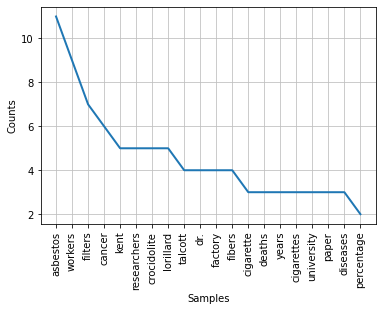

In [22]:
fdist=FreqDist(a[0].lower() for a in tagged0003 if a[1]=="NOUN")
#fdist.tabulate(20)
print(fdist.most_common(20))
freqNouns = [w[0] for w in fdist.most_common(20)]
fdist.plot(20)

Next, the adjectives immediately before the most frequent nouns are determined. What can be concluded from them? 

In [23]:
taggedPairs=bigrams(tagged0003)
adjNounPairs=[(a[0],b[0]) for (a,b) in taggedPairs if b[0].lower() in freqNouns and a[1]=="ADJ"]
for a in adjNounPairs:
    print(a)

('high', 'percentage')
('asbestos-related', 'diseases')
('asbestos-related', 'diseases')
('needle-like', 'fibers')
('cancer-causing', 'asbestos')
('dry', 'fibers')
('asbestos-related', 'diseases')
